# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 19기 DS 정은서님

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras.layers import BatchNormalization
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [26]:
x_train.shape

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [27]:
# X_train과 X_test를 reshape해서 (Data_size, W, H, C) 형태로 변환
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

NC = 10   # Number of classes
Y_train = np_utils.to_categorical(y_train, NC)
Y_test = np_utils.to_categorical(y_test, NC)


print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


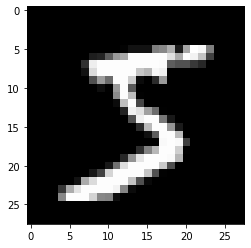

In [28]:
# Hint: x_train[0].reshape()
plt.imshow(x_train[0]).set_cmap('gray')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [29]:
y_train.shape

(60000,)

In [30]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [36]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####

model = tf.keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape = (28, 28, 1)),
    keras.layers.Activation('relu'),
    BatchNormalization(axis=-1),
    keras.layers.Conv2D(32, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),

    BatchNormalization(axis=-1),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    BatchNormalization(axis=-1),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPool2D(pool_size = (2, 2)),

    keras.layers.Flatten(),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dense(512),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(axis=-1),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(10),

    keras.layers.Activation('softmax')
])


In [39]:
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

내가 만든 모델을 확인해 봅시다.

In [40]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 activation_21 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 batch_normalization_14 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 32)        9248      
                                                                 
 activation_22 (Activation)  (None, 24, 24, 32)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                  

model을 자유롭게 train 해봅시다.  

In [44]:
model.fit(X_train, Y_train, batch_size = 128, epochs = 10)

Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0157 - accuracy: 0.9950
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0137 - accuracy: 0.9957
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0153 - accuracy: 0.9948
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0098 - accuracy: 0.9966
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0107 - accuracy: 0.9962
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0090 - accuracy: 0.9969
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0098 - accuracy: 0.9967
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0061 - accuracy: 0.9977
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0061 - accuracy: 0.9978
Epoch 10/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0065 - accuracy: 0.997

95%이상의 성능을 가진 모델을 만들면 완성!

In [45]:
test_loss, test_acc = model.evaluate(X_test,Y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.0277 - accuracy: 0.9924 - 863ms/epoch - 3ms/step

Accuracy: 0.9923999905586243


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)